This tutorial for recommender systems was done using [Krish Naik's Youtube Video.](https://www.youtube.com/watch?v=R64Lh1Qwl_0)

Citation - F. Maxwell Harper and Joseph A. Konstan. 2015. The MovieLens Datasets:
History and Context. ACM Transactions on Interactive Intelligent
Systems (TiiS) 5, 4, Article 19 (December 2015), 19 pages.
DOI=http://dx.doi.org/10.1145/2827872

## Importing Libraries 

In [1]:
import pandas as pd
import numpy as np

## Obtaining Data 

In [2]:
column_names = ["user_id", "item_id", "rating", "timestamp"]
df = pd.read_csv("u.data", sep="\t", names=column_names)

In [3]:
df.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [4]:
movie_titles = pd.read_csv("movie_titles.csv")
movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [5]:
df = pd.merge(df, movie_titles, on="item_id")
df.head()

,user_id,item_id,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


## Exploratory Data Analysis [EDA] 

### Visualization Imports 

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Creating a ratings dataframe with average ratings and number of ratings

In [7]:
df.groupby("title")["rating"].mean().sort_values(ascending=False).head()

title
Marlene Dietrich: Shadow and Light (1996)    5.0
Prefontaine (1997)                           5.0
Santa with Muscles (1996)                    5.0
Star Kid (1997)                              5.0
Someone Else's America (1995)                5.0
Name: rating, dtype: float64

In [8]:
df.groupby("title")["rating"].count().sort_values(ascending=False).head()

title
Star Wars (1977)             583
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

In [9]:
ratings = pd.DataFrame(df.groupby("title")["rating"].mean())
ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [10]:
ratings["num_ratings"] = pd.DataFrame(df.groupby("title")["rating"].count())
ratings.head()

,rating,num_ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


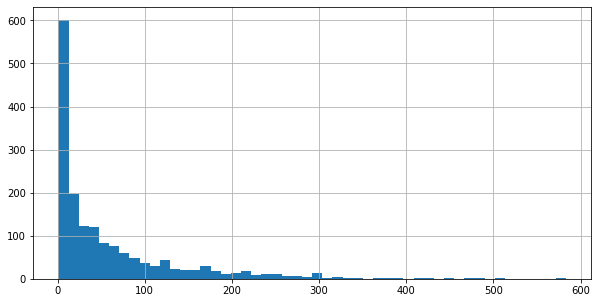

In [11]:
plt.figure(figsize=(10, 5))
ratings["num_ratings"].hist(bins=50)
plt.show()

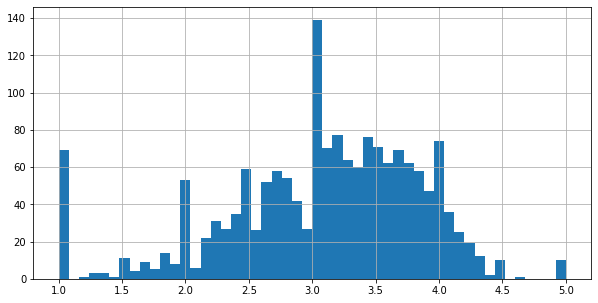

In [12]:
plt.figure(figsize=(10, 5))
ratings["rating"].hist(bins=50)
plt.show()

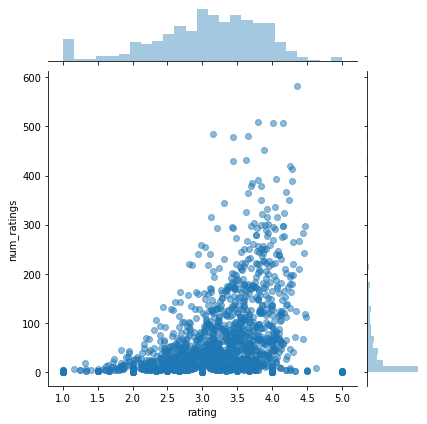

In [13]:
sns.jointplot(x="rating", y="num_ratings", data=ratings, alpha=0.5)
plt.show()

## Recommending similar movies 

In [14]:
moviemat = df.pivot_table(index="user_id", columns="title", values="rating")
moviemat.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN


This gives the rating given by each user for different movies. NaN refers to the movies that the user hasn't rated.

In [15]:
ratings.sort_values("num_ratings", ascending=False).head(10)

,rating,num_ratings
title,,
Star Wars (1977),4.358491,583
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


Choosing Star Wars (1977) and Toy Story (1995).

In [16]:
ratings.head()

,rating,num_ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


getting user ratings for the 2 movies.

In [17]:
starwars_user_ratings = moviemat["Star Wars (1977)"]
toystory_user_ratings = moviemat["Toy Story (1995)"]
toystory_user_ratings.head()

user_id
1    5.0
2    4.0
3    NaN
4    NaN
5    4.0
Name: Toy Story (1995), dtype: float64

Using corrwith() method to get the correlation between 2 data frames.

In [18]:
similar_starwars = moviemat.corrwith(starwars_user_ratings)
similar_toystory = moviemat.corrwith(toystory_user_ratings)

D:\anaconda3\lib\site-packages\numpy\lib\function_base.py:2522: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
D:\anaconda3\lib\site-packages\numpy\lib\function_base.py:2451: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [19]:
corr_starwars = pd.DataFrame(similar_starwars, columns=["Correlation"])
corr_starwars.dropna(inplace=True)
corr_starwars.head()

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


Higher the correlation value, the movie is more likely to be recommended. The next step is to ensure that the system only recommends movies that have received a certain minimum count of ratings in order to ensure that rarely reviewed movies can be ignored.

In [20]:
corr_starwars.sort_values("Correlation", ascending=False).head(10)

,Correlation
title,
Hollow Reed (1996),1.0
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
Star Wars (1977),1.0
Man of the Year (1995),1.0
"Beans of Egypt, Maine, The (1994)",1.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0


Adding the number of ratings to the correlation dataframe.

In [21]:
corr_starwars = corr_starwars.join(ratings["num_ratings"])
corr_starwars.head()

,Correlation,num_ratings
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


In [22]:
corr_starwars[corr_starwars["num_ratings"] > 100].sort_values(
    "Correlation", ascending=False
).head()

,Correlation,num_ratings
title,,
Star Wars (1977),1.000000,583
"Empire Strikes Back, The (1980)",0.747981,367
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130


If the viewer has seen Star Wars (1977), the next movie to be recommended will be Empire Strikes Back, The (1980) and so on.

Similarily, for Toy Story (1995)

In [23]:
corr_toystory = pd.DataFrame(similar_toystory, columns=["Correlation"])
corr_toystory.dropna(inplace=True)
corr_toystory = corr_toystory.join(ratings["num_ratings"])
corr_toystory[corr_toystory["num_ratings"] > 100].sort_values(
    "Correlation", ascending=False
).head()

,Correlation,num_ratings
title,,
Toy Story (1995),1.000000,452
"Craft, The (1996)",0.549100,104
Down Periscope (1996),0.457995,101
Miracle on 34th Street (1994),0.456291,101
G.I. Jane (1997),0.454756,175
